<a href="https://colab.research.google.com/github/CharanSaiManda/A/blob/main/LayoutLMV_Q%26A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q git+https://github.com/huggingface/transformers.git

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 163 kB 7.8 MB/s 
     |████████████████████████████████| 7.6 MB 53.3 MB/s 


In [2]:
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 441 kB 7.5 MB/s 
     |████████████████████████████████| 115 kB 51.7 MB/s 
     |████████████████████████████████| 212 kB 42.3 MB/s 
     |████████████████████████████████| 95 kB 5.2 MB/s 
     |████████████████████████████████| 127 kB 52.8 MB/s 
     |████████████████████████████████| 115 kB 53.7 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: dill
    Found existing installation: dill 0.3.6
    Uninstalling dill-0.3.6:
      Successfully uninstalled dill-0.3.6


In [3]:
! apt install tesseract-ocr
! apt install libtesseract-dev
! pip install pytesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 4 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 2s (2,730 kB/s)
Selecting previously unselecte

In [4]:
!pip install pillow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
from transformers import AutoTokenizer, LayoutLMForQuestionAnswering
from datasets import load_dataset
import torch

In [2]:
tokenizer = AutoTokenizer.from_pretrained("impira/layoutlm-document-qa", add_prefix_space=True)
model = LayoutLMForQuestionAnswering.from_pretrained("impira/layoutlm-document-qa", revision="1e3ebac")

In [3]:
from transformers import LayoutLMv3FeatureExtractor
import pytesseract
from PIL import Image

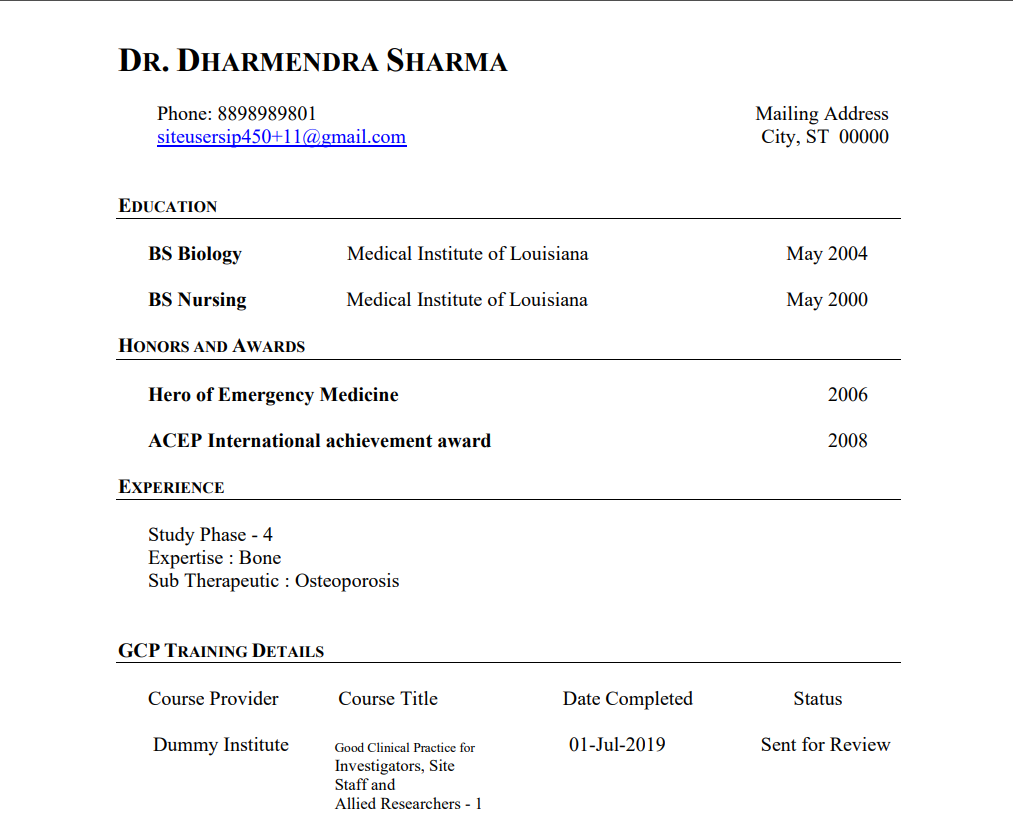

In [27]:
im = Image.open('/content/misc1.png')
im

In [73]:
dataset = load_dataset("nielsr/funsd", split="train")
example = dataset[0]
question = "what are the achievements?"
words = example["words"]
boxes = example["bboxes"]

In [74]:
from transformers import LayoutLMv3FeatureExtractor
import pytesseract
image = Image.open('/content/misc1.png').convert("RGB")

feature_extractor = LayoutLMv3FeatureExtractor()
encoding = feature_extractor(image, return_tensors="pt")
print(encoding.keys())

dict_keys(['pixel_values', 'words', 'boxes'])


In [75]:
inf_data = encoding
words = inf_data["words"][0]
boxes = inf_data["boxes"][0]

In [76]:
encoding = tokenizer(
    question.split(), list(words), is_split_into_words=True, return_token_type_ids=True, return_tensors="pt"
)
bbox = []
for i, s, w in zip(encoding.input_ids[0], encoding.sequence_ids(0), encoding.word_ids(0)):
    if s == 1:
        bbox.append(boxes[w])
    elif i == tokenizer.sep_token_id:
        bbox.append([1000] * 4)
    else:
        bbox.append([0] * 4)
encoding["bbox"] = torch.tensor([bbox])

In [77]:
word_ids = encoding.word_ids(0)
outputs = model(**encoding)
loss = outputs.loss
start_scores = outputs.start_logits
end_scores = outputs.end_logits
start, end = word_ids[start_scores.argmax(-1)], word_ids[end_scores.argmax(-1)]
print(" ".join(words[start : end + 1]))

8898989801 Mailing Address siteusersip450+11@gmail.com City, ST 00000


In [3]:
from transformers import AutoProcessor, AutoModelForQuestionAnswering
from datasets import load_dataset
import torch

processor = AutoProcessor.from_pretrained("microsoft/layoutlmv3-base", apply_ocr=False)
model = AutoModelForQuestionAnswering.from_pretrained("microsoft/layoutlmv3-base")

dataset = load_dataset("nielsr/funsd-layoutlmv3", split="train")
example = dataset[0]
image = example["image"]
question = "what's his name?"
words = example["tokens"]
boxes = example["bboxes"]

encoding = processor(image, question, words, boxes=boxes, return_tensors="pt")
start_positions = torch.tensor([1])
end_positions = torch.tensor([3])

outputs = model(**encoding, start_positions=start_positions, end_positions=end_positions)
loss = outputs.loss
start_scores = outputs.start_logits
end_scores = outputs.end_logits

The size parameter should be a dictionary with keys ('height', 'width'), ('shortest_edge', 'longest_edge') or ('shortest_edge',) got 224. Setting as {'height': 224, 'width': 224}.
Some weights of LayoutLMv3ForQuestionAnswering were not initialized from the model checkpoint at microsoft/layoutlmv3-base and are newly initialized: ['qa_outputs.dense.weight', 'qa_outputs.out_proj.bias', 'qa_outputs.dense.bias', 'qa_outputs.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.7/dist-packages/transformers/modeling_utils.py:764: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  "The `device` argument is deprecated and will be removed in v5 of Transformers.", FutureWarning


In [7]:
predicted_start_idx = outputs.start_logits.argmax(-1).item()
predicted_end_idx = outputs.end_logits.argmax(-1).item()
predicted_start_idx, predicted_end_idx

(72, 162)

In [8]:
predicted_answer_tokens = encoding.input_ids.squeeze()[predicted_start_idx : predicted_end_idx + 1]
predicted_answer = processor.tokenizer.decode(predicted_answer_tokens)
predicted_answer

' S. Wigand Supervisor / Manager Discontinue coal retention analyses on licensee submitted product samples (Note : Coal Retention testing is not performed by most licensees. Other B&W physical measurements as ends stability and inspection for soft spots in ciparettes are thought to be sufficient measures to assure cigarette physical integrity. The proposed action will increase laboratory productivity. ) Suggested Solutions (s) : Delete coal retention from the list of standard analyses performed'

In [9]:
target_start_index = torch.tensor([7])
target_end_index = torch.tensor([14])
outputs = model(**encoding, start_positions=target_start_index, end_positions=target_end_index)
predicted_answer_span_start = outputs.start_logits.argmax(-1).item()
predicted_answer_span_end = outputs.end_logits.argmax(-1).item()
predicted_answer_span_start, predicted_answer_span_end

/usr/local/lib/python3.7/dist-packages/transformers/modeling_utils.py:764: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  "The `device` argument is deprecated and will be removed in v5 of Transformers.", FutureWarning


(72, 162)

In [10]:
a_tokens = encoding.input_ids.squeeze()[predicted_answer_span_start : predicted_answer_span_end+1]
a = processor.tokenizer.decode(a_tokens)
a

' S. Wigand Supervisor / Manager Discontinue coal retention analyses on licensee submitted product samples (Note : Coal Retention testing is not performed by most licensees. Other B&W physical measurements as ends stability and inspection for soft spots in ciparettes are thought to be sufficient measures to assure cigarette physical integrity. The proposed action will increase laboratory productivity. ) Suggested Solutions (s) : Delete coal retention from the list of standard analyses performed'